In [19]:
import pandas as pd
import re
import numpy as np
import ast
import json
import os

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Evaluation of Presidio results on own datasets

In [20]:
lan_data_labels = pd.read_csv("../../datasets/test_languages/test_labels_personal.csv")
lan_data = pd.read_csv("../../datasets//test_languages/test.csv")
lan_data_classes = pd.read_csv("../../datasets/test_languages/test_classes.csv")
lan_data_dataset = pd.read_csv("../../datasets/test_languages/test_dataset.csv")

kaggle_data_labels = pd.read_csv("../../datasets/kaggle_datasets/all_datasets_labels_personal.csv")
kaggle_data = pd.read_csv("../../datasets/kaggle_datasets/all_datasets.csv")

openml_data_labels = pd.read_csv("../../datasets/openml_datasets/all_datasets_labels_personal.csv")
openml_data = pd.read_csv("../../datasets/openml_datasets/all_datasets.csv")

openml_2_data_labels = pd.read_csv("../../datasets/openml_datasets_2/all_datasets_labels_personal.csv")
openml_2_data = pd.read_csv("../../datasets/openml_datasets_2/all_datasets.csv")

medical_data_labels = pd.read_csv("../../datasets/freiburg-medical/test_labels_personal.csv")
medical_data = pd.read_csv("../../datasets/freiburg-medical/test.csv")

In [21]:
data_openmlall = pd.read_csv("../../datasets/OpenMLall_data/OpenMLAll_data.csv")
labels_openmlall = pd.read_csv("../../datasets/OpenMLall_data/OpenMLAll_data_labels.csv")

In [22]:
data_mimic = pd.read_csv('../../datasets/MIMICIIIandHonda/Mimic_for_Use.csv')
labels_mimic = pd.read_csv('../../datasets/MIMICIIIandHonda/Mimic_labels.csv')

In [23]:
data_mimic = data_mimic.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [24]:
data_mimicNew = pd.read_csv('../../datasets/MIMICIIIandHonda/MIMIC_100_all_FIN2025.csv')
labels_mimicNew = pd.read_csv('../../datasets/MIMICIIIandHonda/fmimic_labels1.csv')

In [25]:
def read_files_binary(method, dataset):
    results = pd.read_csv(f"/home/aagisha/Documents/PhD Albert/CodingPhDStart1/Bachelor Projects HSAA/PIIDETECTION/Personal-Detection/Presidio/predictions/binary_results/{dataset}/results_{method}.csv")
    return results

In [26]:

results_rowwise1_lan = read_files_binary("rowwise1", "test_languages_res")
results_rowwise2_lan = read_files_binary("rowwise2", "test_languages_res")
results_columnwise_lan = read_files_binary("columnwise", "test_languages_res")

results_rowwise1_kaggle = read_files_binary("rowwise1", "kaggle")
results_rowwise2_kaggle = read_files_binary("rowwise2", "kaggle")
results_columnwise_kaggle = read_files_binary("columnwise", "kaggle")

results_rowwise1_openml = read_files_binary("rowwise1", "openml")
results_rowwise2_openml = read_files_binary("rowwise2", "openml")
results_columnwise_openml = read_files_binary("columnwise", "openml")

results_rowwise1_openml_2 = read_files_binary("rowwise1", "openml_2")
results_rowwise2_openml_2 = read_files_binary("rowwise2", "openml_2")
results_columnwise_openml_2 = read_files_binary("columnwise", "openml_2")

results_rowwise1_medical = read_files_binary("rowwise1", "medical")
results_rowwise2_medical = read_files_binary("rowwise2", "medical")
results_columnwise_medical = read_files_binary("columnwise", "medical")

In [27]:
results_rowwise1_mimic = read_files_binary("rowwise1", "mimicIII")
results_rowwise2_mimic = read_files_binary("rowwise2", "mimicIII")
results_columnwise_mimic = read_files_binary("columnwise", "mimicIII")

In [28]:
results_rowwise1_mimicNew = read_files_binary("rowwise1", "MIMICNew")
results_rowwise2_mimicNew = read_files_binary("rowwise2", "MIMICNew")
results_columnwise_mimicNew = read_files_binary("columnwise", "MIMICNew")

In [29]:
results_rowwise1_openmlall = read_files_binary("rowwise1", "OpenMLall")
results_rowwise2_openmlall = read_files_binary("rowwise2", "OpenMLall")
results_columnwise_openmlall = read_files_binary("columnwise", "OpenMLall")

In [70]:
# results_rowwise1_mimic = pd.read_csv('/home/aagisha/Documents/PhD Albert/CodingPhDStart1/Bachelor Projects HSAA/PIIDETECTION/Personal-Detection/Presidio/predictions/binary_results/mimicIII/results_rowwise1mim.csv')
# results_rowwise2_mimic =pd.read_csv('/home/aagisha/Documents/PhD Albert/CodingPhDStart1/Bachelor Projects HSAA/PIIDETECTION/Personal-Detection/Presidio/predictions/binary_results/mimicIII/results_rowwise1mim2.csv')
# results_columnwise_mimic = pd.read_csv('/home/aagisha/Documents/PhD Albert/CodingPhDStart1/Bachelor Projects HSAA/PIIDETECTION/Personal-Detection/Presidio/predictions/binary_results/mimicIII/results_columnwisemim1.csv')

The Classes of Presidio must be mapped to personal or non-personal data

In [30]:
s = set()
for df in [results_rowwise1_kaggle, results_rowwise2_kaggle, results_columnwise_kaggle, 
           results_rowwise1_lan, results_rowwise2_lan, results_columnwise_lan, 
           results_rowwise1_openml, results_rowwise2_openml, results_columnwise_openml,
           results_rowwise1_openml_2, results_rowwise2_openml_2, results_columnwise_openml_2,
           results_rowwise1_medical, results_rowwise2_medical, results_columnwise_medical,
           results_rowwise1_mimic,results_rowwise2_mimic, results_columnwise_mimic, 
           results_rowwise1_mimicNew, results_rowwise2_mimicNew,results_columnwise_mimicNew, 
           results_rowwise1_openmlall, results_rowwise2_openmlall, results_columnwise_openmlall]:
     for i in range(df.shape[1]):
          for j in range(2,201,2):
               for v in ast.literal_eval(df.iloc[j,i]):
                    v_splitted = v.split(".")[0]
                    s.add(v_splitted)
s

{'AU_ABN_1',
 'AU_ACN_1',
 'AU_MEDICARE_1',
 'AU_TFN_1',
 'CREDIT_CARD_1',
 'DATE_TIME_0',
 'EMAIL_ADDRESS_1',
 'IBAN_CODE_1',
 'IN_AADHAAR_1',
 'IN_PAN_0',
 'IN_VEHICLE_REGISTRATION_0',
 'IP_ADDRESS_0',
 'LOCATION_0',
 'MEDICAL_LICENSE_1',
 'NRP_0',
 'PERSON_0',
 'PHONE_NUMBER_0',
 'UK_NHS_1',
 'URL_0',
 'US_BANK_NUMBER_0',
 'US_DRIVER_LICENSE_0',
 'US_ITIN_0',
 'US_PASSPORT_0',
 'US_SSN_0',
 'shared DATE_TIME_0',
 'shared IN_PAN_0',
 'shared LOCATION_0',
 'shared NRP_0',
 'shared PERSON_0',
 'shared URL_0',
 'shared US_DRIVER_LICENSE_0'}

In [31]:
# classes that not contain personal info, all other classes are personal-related
NON_PERSONAL = ["AU_ABN", "AU_ACN", "DATE_TIME", "LOCATION", "URL", "shared DATE_TIME", "shared LOCATION", "shared URL"]

It is very unlikely that the recognized Australian and Indian IDS are correct, Presidio might perform worse

In [32]:
def get_categories_binary(strings):
    if strings == []:
        return "non-personal"
    for s in strings:
        if s not in NON_PERSONAL:
            return "personal"  
    return "non-personal"

def build_dataframe_binary(results_df, threshold_score, threshold_count):
    height, width = results_df.shape
    results_copy = results_df.copy()
    print(f"Threshold score: {threshold_score}\nThreshold count: {threshold_count}")
    empty_row1 = [[] for _ in range(width)]
    empty_row2 = [[] for _ in range(width)]
    empty_row3 = ["" for _ in range(width)]
    results_copy.loc[height] = empty_row1.copy()
    results_copy.loc[height+1] = empty_row2.copy()
    results_copy.loc[height+2] = empty_row3.copy()
    for i in range(width):
        series = pd.Series([item for sublist in results_copy.iloc[2:height:2, i]
                        for item in ast.literal_eval(sublist)], dtype="object").value_counts()
        for a, b in series.items():
            if b > threshold_count:
                results_copy.iloc[height, i].append(a)
                results_copy.iloc[height+1, i].append(b)
    for i in range(width):
        entities = [re.sub(r'_\d+(\.\d+)?$', '', item)
                    for item in results_copy.iloc[height, i] if float(re.search(r'(\d+\.\d+)', item).group(1)) >= threshold_score]
        mapped_entities = get_categories_binary(entities)
        results_copy.iloc[height+2, i] = mapped_entities
    return results_copy

def compute_performance_binary(results, medical = False):
    results_copy = results.copy()
    #map personal/non-personal to 1/0 so that the metrices are meaningful
    y_true = results_copy.loc[0].map(lambda x: 1 if x == "personal" else 0)
    y_pred = results_copy.loc[results_copy.shape[0]-1].map(lambda x: 1 if x == "personal" else 0)
    precision = precision_score(y_true, y_pred, zero_division=0.0)
    recall = recall_score(y_true, y_pred, zero_division=0.0)
    f1 = f1_score(y_true, y_pred, zero_division=0.0)
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred) if medical == False else 0.0
    evaluation = {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    }
    
    return evaluation

Apply threshold on the Presidio score and the amount of detection   
Find out which thresholds and which method yields the best results

In [75]:
order=["lan", "kaggle", "openml", "openml_2", "medical", "mimicIII","MIMICNew","OpenMLall"]
file_name = ["two_languages", "kaggle", "openml", "openml_2", "medical","mimicIII","MIMICNew","OpenMLall"]
for e, df in enumerate([results_rowwise1_lan, results_rowwise1_kaggle, results_rowwise1_openml, results_rowwise1_openml_2, results_rowwise1_medical, results_rowwise1_mimic,results_rowwise1_mimicNew, results_rowwise1_openmlall]):
    evals = dict()
    print("Method 1 Rowwise")
    for threshold_score in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        for threshold_count in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
            eval = compute_performance_binary(build_dataframe_binary(df, threshold_score, threshold_count), medical = False if e != 4 else True)
            evals[f"{order[e]}_{threshold_score}_{threshold_count}"] = eval
    with open(f"../predictions/binary_thresholds/personal/{file_name[e]}/rowwise1.json", "w") as json_file:
        json.dump(evals, json_file, indent=4)
for e, df in enumerate([results_rowwise2_lan, results_rowwise2_kaggle, results_rowwise2_openml, results_rowwise2_openml_2, results_rowwise2_medical, results_rowwise2_mimic,results_rowwise2_mimicNew,results_rowwise2_openmlall]):
    evals = dict()
    print("Method 2 Rowwise")
    for threshold_score in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        for threshold_count in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
            eval = compute_performance_binary(build_dataframe_binary(df, threshold_score, threshold_count), medical = False if e != 4 else True)
            evals[f"{order[e]}_{threshold_score}_{threshold_count}"] = eval
    with open(f"../predictions/binary_thresholds/personal/{file_name[e]}/rowwise2.json", "w") as json_file:
        json.dump(evals, json_file, indent=4)
for e, df in enumerate([results_columnwise_lan, results_columnwise_kaggle,  results_columnwise_openml, results_columnwise_openml_2, results_columnwise_medical, results_columnwise_mimic, results_columnwise_mimicNew,results_columnwise_openmlall]):  
    evals = dict()
    print("Method Columnwise")
    for threshold_score in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        for threshold_count in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
            eval = compute_performance_binary(build_dataframe_binary(df, threshold_score, threshold_count), medical = False if e != 4 else True)
            evals[f"{order[e]}_{threshold_score}_{threshold_count}"] = eval
    with open(f"../predictions/binary_thresholds/personal/{file_name[e]}/columnwise.json", "w") as json_file:
        json.dump(evals, json_file, indent=4)

Method 1 Rowwise
Threshold score: 0
Threshold count: 0
Threshold score: 0
Threshold count: 10
Threshold score: 0
Threshold count: 20
Threshold score: 0
Threshold count: 30
Threshold score: 0
Threshold count: 40
Threshold score: 0
Threshold count: 50
Threshold score: 0
Threshold count: 60
Threshold score: 0
Threshold count: 70
Threshold score: 0
Threshold count: 80
Threshold score: 0
Threshold count: 90
Threshold score: 0.1
Threshold count: 0
Threshold score: 0.1
Threshold count: 10
Threshold score: 0.1
Threshold count: 20
Threshold score: 0.1
Threshold count: 30
Threshold score: 0.1
Threshold count: 40
Threshold score: 0.1
Threshold count: 50
Threshold score: 0.1
Threshold count: 60
Threshold score: 0.1
Threshold count: 70
Threshold score: 0.1
Threshold count: 80
Threshold score: 0.1
Threshold count: 90
Threshold score: 0.2
Threshold count: 0
Threshold score: 0.2
Threshold count: 10
Threshold score: 0.2
Threshold count: 20
Threshold score: 0.2
Threshold count: 30
Threshold score: 0.2
T

In [33]:
def create_df_from_json(i, dataset):
    with open(f"../predictions/binary_thresholds/personal/{dataset}/{i}.json", "r") as file:
        data = json.load(file)
    if dataset == "openml_2":
        openml_2 = 1
    else:
        openml_2 = 0
    dataset, threshold_score, threshold_count, f1, precision, recall, accuracy, roc_auc = [], [], [], [], [], [], [], []
    for (d,val) in zip(data, data.values()):
        splitted = d.split("_")
        dataset.append(splitted[0])
        threshold_score.append(splitted[1 + openml_2])
        threshold_count.append(splitted[2 + openml_2])
        f1.append(val["f1"])
        precision.append(val["precision"])
        recall.append(val["recall"])
        accuracy.append(val["accuracy"])
        roc_auc.append(val["roc_auc"])
    data = {
        "dataset": dataset,
        "threshold_score": threshold_score,
        "threshold_count": threshold_count,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "roc_auc": roc_auc
    }
    return pd.DataFrame(data)

In [34]:
df_rowwise1_lan = create_df_from_json("rowwise1", "two_languages")
df_rowwise2_lan = create_df_from_json("rowwise2", "two_languages")
df_columnwise_lan = create_df_from_json("columnwise", "two_languages")

df_rowwise1_kaggle = create_df_from_json("rowwise1", "kaggle")
df_rowwise2_kaggle = create_df_from_json("rowwise2", "kaggle")
df_columnwise_kaggle = create_df_from_json("columnwise", "kaggle")

df_rowwise1_openml = create_df_from_json("rowwise1", "openml")
df_rowwise2_openml = create_df_from_json("rowwise2", "openml")
df_columnwise_openml = create_df_from_json("columnwise", "openml")

df_rowwise1_openml_2 = create_df_from_json("rowwise1", "openml_2")
df_rowwise2_openml_2 = create_df_from_json("rowwise2", "openml_2")
df_columnwise_openml_2 = create_df_from_json("columnwise", "openml_2")

df_rowwise1_medical = create_df_from_json("rowwise1", "medical")
df_rowwise2_medical = create_df_from_json("rowwise2", "medical")
df_columnwise_medical = create_df_from_json("columnwise", "medical")

df_rowwise1_mimic = create_df_from_json("rowwise1", "mimicIII")
df_rowwise2_mimic = create_df_from_json("rowwise2", "mimicIII")
df_columnwise_mimic = create_df_from_json("columnwise", "mimicIII")

df_rowwise1_mimicNew = create_df_from_json("rowwise1", "MIMICNew")
df_rowwise2_mimicNew = create_df_from_json("rowwise2", "MIMICNew")
df_columnwise_mimicNew = create_df_from_json("columnwise", "MIMICNew")

df_rowwise1_openmlall = create_df_from_json("rowwise1", "OpenMLall")
df_rowwise2_openmlall = create_df_from_json("rowwise2", "OpenMLall")
df_columnwise_openmlall = create_df_from_json("columnwise", "OpenMLall")

In [35]:
df_lan = pd.concat([df_rowwise1_lan, df_rowwise2_lan, df_columnwise_lan]).reset_index(drop=True)
df_kaggle = pd.concat([df_rowwise1_kaggle, df_rowwise2_kaggle, df_columnwise_kaggle]).reset_index(drop=True)
df_openml = pd.concat([df_rowwise1_openml, df_rowwise2_openml, df_columnwise_openml]).reset_index(drop=True)
df_openml_2 = pd.concat([df_rowwise1_openml_2, df_rowwise2_openml_2, df_columnwise_openml_2]).reset_index(drop=True)
df_medical = pd.concat([df_rowwise1_medical, df_rowwise2_medical, df_columnwise_medical]).reset_index(drop=True)
df_mimic = pd.concat([df_rowwise1_mimic,df_rowwise2_mimic, df_columnwise_mimic]).reset_index(drop=True)
df_mimicNew = pd.concat([df_rowwise1_mimicNew,df_rowwise2_mimicNew, df_columnwise_mimicNew]).reset_index(drop=True)
df_openmlall = pd.concat([df_rowwise1_openmlall,df_rowwise2_openmlall, df_columnwise_openmlall]).reset_index(drop=True)

for (df, dataset) in zip([df_lan, df_kaggle, df_openml, df_openml_2, df_medical, df_mimic, df_mimicNew, df_openmlall], ["two_languages", "kaggle", "openml", "openml_2", "medical", "mimicIII", "MIMICNew","OpenMLall"]):
    z_values = []
    for s in ["f1", "precision", "recall", "accuracy", "roc_auc"]:
        z_values.append(max(df[f'{s}']))
        z_values.append(min(df[f'{s}']))

    zmin = min(z_values)
    zmax = max(z_values)

    fig = make_subplots(
        rows=5, cols=3, row_titles=("F1-Score", "Precision", "Recall", "Accuracy", "ROC_AUC"), column_titles=("Rowwise 1", "Rowwise 2", "Columnwise"),
        shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.05, horizontal_spacing=0.025, x_title="Threshold score", y_title="Threshold count",
        specs=[[{"type": "contour"}, {"type": "contour"}, {"type": "contour"}],
            [{"type": "contour"}, {"type": "contour"}, {"type": "contour"}],
            [{"type": "contour"}, {"type": "contour"}, {"type": "contour"}],
            [{"type": "contour"}, {"type": "contour"}, {"type": "contour"}],
            [{"type": "contour"}, {"type": "contour"}, {"type": "contour"}]]
    )

    for e, i in enumerate([110, 220, 330]):
        for ee, s in enumerate(["f1", "precision", "recall", "accuracy", "roc_auc"]):
            start_idx = e * 110
            end_idx = start_idx + 110
            df_subset = df.iloc[start_idx:end_idx]
            Z = np.array(df_subset.pivot(index='threshold_count', columns='threshold_score', values=f'{s}'))
            threshold_scores = sorted(df_subset['threshold_score'].unique())
            threshold_counts = sorted(df_subset['threshold_count'].unique())

            fig.add_trace(go.Contour(z=Z, x=threshold_scores, y=threshold_counts, colorscale="Viridis", zmin=zmin, zmax=zmax,
                colorbar=dict(title="F1 score"), contours=dict(showlabels=True)), row=ee+1, col=e+1)

            hover_text = [f"x: {x}, y: {y}, z: {z}" for x, y, z in zip(df_subset['threshold_score'],df_subset['threshold_count'],df_subset[f'{s}'])]

            fig.add_trace(go.Scatter(
                x=df_subset['threshold_score'], y=df_subset['threshold_count'], mode='markers', marker=dict(color='black', symbol='x'),
                text=hover_text, hoverinfo="text", showlegend=False), row=ee+1, col=e+1)

            df_subset[f'{s}']
            max_micro_f1_index = df_subset[f'{s}'].idxmax()  
            max_micro_f1_row = df.loc[max_micro_f1_index]
            max_threshold_score = max_micro_f1_row['threshold_score']
            max_threshold_count = max_micro_f1_row['threshold_count']
            max_micro_f1_score = max_micro_f1_row[f'{s}']
            
            hover_text = [f"x: {x}, y: {y}, z: {z}" for x, y, z in zip([max_threshold_score],[max_threshold_count],[max_micro_f1_score])]
            fig.add_trace(go.Scatter(x=[max_threshold_score], y=[max_threshold_count], marker=dict(color='red', symbol='x'), showlegend=True if e == 0 and ee == 0 else False,
                            mode="markers", text=hover_text, hoverinfo="text", name="best_score", legendgroup="best"), row=ee+1, col=e+1)

    fig.update_layout(
        title=f"Contour Plot of different performance metrics on {dataset} dataset separated by Presidio analyzer approach",
        legend=dict(x=1,y=1.1),
        height=700,
        width=1200
    )

    fig.show()


 --> Best threshold depends on which metric is most important  
 --> In best_threshold.txt are all thresholds noted

# Presidio Evaluation Performance on binary data between analyzer and structured

In [36]:
def predict_analysis_results(data_test, tabular_analysis):
    predictions = []
    for i in data_test.columns:
        if i in tabular_analysis.keys():
            if tabular_analysis[i] in NON_PERSONAL:
                predictions.append("non-personal")
            else:
                predictions.append("personal")
        else:
            predictions.append("non-personal")
    return predictions

def compute_performance_structured(data_test, data_test_labels, tabular_analysis, medical = False):
    y_pred = predict_analysis_results(data_test, tabular_analysis)
    y_pred = [1 if x == "personal" else 0 for x in y_pred ]
    y_true = data_test_labels["label"].map(lambda x: 1 if x == "personal" else 0)
    precision = precision_score(y_true, y_pred, zero_division=0.0)
    recall = recall_score(y_true, y_pred, zero_division=0.0)
    f1 = f1_score(y_true, y_pred, zero_division=0.0)
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred) if medical == False else 0.0
    return [precision, recall, f1, accuracy, roc_auc]

In [37]:
def visualize_results(approaches_results, data, labels, title, score, count, medical = False):
    fig = go.Figure()
    colors = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", "#19D3F3"]
    for ee, (analyzer, analyzer_name) in enumerate(zip(approaches_results, ["rowwise1", "rowwise2", "columnwise"])):
        df_presidio = analyzer.loc[(analyzer["threshold_score"] == score) & (analyzer["threshold_count"] == count)]
        df_presidio = df_presidio.iloc[:,[4,5,3,6,7]]
        fig.add_trace(go.Bar(x=df_presidio.columns, y=df_presidio.values[0], name=f"Presidio {analyzer_name}<br> thresholds {score}/{count}", legendgroup=analyzer_name, 
                                showlegend=True, marker=dict(color=colors[ee+1])))

    for eee, strategy in enumerate(["most_common", "highest_confidence"]):
        with open(f"../predictions/binary_results/{title}/{strategy}.json", "rb") as file:
            tabular_analysis = json.load(file)
        performance = compute_performance_structured(data, labels, tabular_analysis, medical=medical)
        fig.add_trace(go.Bar(x=df_presidio.columns, y=performance, name=f"structured Presidio<br> {strategy}", legendgroup=strategy, showlegend=True, 
                        marker=dict(color=colors[4+eee])))
    fig.update_layout(title=f"Performance Metrics Comparison all Presidio approaches on {title} data", barmode='group', width=1200)
    fig.update_xaxes(title_text="Metrics")
    fig.update_yaxes(title_text="Score")
    fig.show()

In [38]:
visualize_results([df_rowwise1_lan, df_rowwise2_lan, df_columnwise_lan], lan_data, lan_data_labels, "test_languages_res", "0.1", "20")
visualize_results([df_rowwise1_kaggle, df_rowwise2_kaggle, df_columnwise_kaggle], kaggle_data, kaggle_data_labels, "kaggle", "0", "0")
visualize_results([df_rowwise1_openml, df_rowwise2_openml, df_columnwise_openml], openml_data, openml_data_labels, "openml", "0.1", "50")
visualize_results([df_rowwise1_openml_2, df_rowwise2_openml_2, df_columnwise_openml_2], openml_2_data, openml_2_data_labels, "openml_2", "0.1", "50")
visualize_results([df_rowwise1_medical, df_rowwise2_medical, df_columnwise_medical], medical_data, medical_data_labels, "medical", "0", "0", medical=True)

In [39]:
def plot_presidio_results(data_personal, results_personal, dataset, medical = False):
    y_true = data_personal["label"].values
    y_pred = results_personal.loc[results_personal.shape[0]-1].values
    y_true_bin = [1 if label == "personal" else 0 for label in y_true]
    y_pred_bin = [1 if label == "personal" else 0 for label in y_pred]

    cm = confusion_matrix(y_true, y_pred, labels=["personal", "non-personal"])
    cm_norm = confusion_matrix(y_true, y_pred, labels=["personal", "non-personal"], normalize="true")

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0.0)
    auc_roc = roc_auc_score(y_true_bin, y_pred_bin) if medical == False else 0.0

    fig = make_subplots(
        rows=1, cols=2, 
        subplot_titles=["Evaluation Metrics", "Confusion Matrix"]
    )

    metrics = {
        "weighted Precision": precision,
        "weighted Recall": recall,
        "weighted F1 Score": f1,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

    fig.add_trace(go.Bar(
        x=list(metrics.keys()),
        y=list(metrics.values()), 
        showlegend=False
    ), row=1, col=1)
    fig.update_yaxes(range=[0,1.1], row=1, col=1)
    
    text_values = [
        [f"{cm[0,0]}<br>{cm_norm[0,0]:.2f}", f"{cm[0,1]}<br>{cm_norm[0,1]:.2f}"],
        [f"{cm[1,0]}<br>{cm_norm[1,0]:.2f}", f"{cm[1,1]}<br>{cm_norm[1,1]:.2f}"]
    ]
    cm_heatmap = go.Heatmap(
        z=cm, 
        x=["Pred: personal", "Pred: non-personal"], 
        y=["True: personal", "True: non-personal"], 
        colorscale="Blues", 
        showscale=False,
        text=text_values, 
        texttemplate="%{text}",
        textfont={"size":20},
    )


    fig.add_trace(cm_heatmap, row=1, col=2)

    fig.update_layout(
        title=f"Confusion Matrix and Evaluation Metrics for {dataset} data",
        height=500, 
        width=1000,
        showlegend=False
    )

    fig.show()
results_lan_final = build_dataframe_binary(results_rowwise1_lan, 0.1, 20)
results_kaggle_final = build_dataframe_binary(results_rowwise1_kaggle, 0, 0)
results_openml_final = build_dataframe_binary(results_rowwise1_openml, 0.1, 50)
results_openml_2_final = build_dataframe_binary(results_rowwise2_openml_2, 0.1, 50)
results_medical_final = build_dataframe_binary(results_rowwise1_medical, 0, 0)
resltats_mimic_final = build_dataframe_binary(results_rowwise1_mimic, 0, 40)
plot_presidio_results(lan_data_labels, results_lan_final, "two languages")
plot_presidio_results(kaggle_data_labels, results_kaggle_final, "kaggle")
plot_presidio_results(openml_data_labels, results_openml_final, "openml")
plot_presidio_results(openml_2_data_labels, results_openml_2_final, "openml_2")
plot_presidio_results(medical_data_labels, results_medical_final, "medical" , medical = True)


Threshold score: 0.1
Threshold count: 20
Threshold score: 0
Threshold count: 0
Threshold score: 0.1
Threshold count: 50
Threshold score: 0.1
Threshold count: 50
Threshold score: 0
Threshold count: 0
Threshold score: 0
Threshold count: 40


In [122]:
# BuilddataFrameMIMIC = []
# keep_blocks = []
# for threshold_score in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
#         for threshold_count in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
#                 keep_blocks.append([threshold_score, threshold_count])
#                 BuilddataFrameMIMIC.append(build_dataframe_binary(results_rowwise1_mimic, threshold_score, threshold_count))

In [24]:
# BuilddataFrameMIMIC[4]

In [25]:
# for build in BuilddataFrameMIMIC:
#     plot_presidio_results(labels_mimic, build, "mimicIII")

In [106]:
visualize_results([df_rowwise1_mimic,df_rowwise2_mimic, df_columnwise_mimic], data_mimic, labels_mimic, "mimicIII", "0", "40")
results_mimic_final = build_dataframe_binary(results_rowwise1_mimic, 0., 40)
plot_presidio_results(labels_mimic, resltats_mimic_final, "mimicIII")

Threshold score: 0.0
Threshold count: 40


In [40]:
results_df_mimic = pd.DataFrame({
    "Column": data_mimic.columns,
    "Prediction": results_mimic_final.loc[results_mimic_final.shape[0]-1].values,
    "True Label": labels_mimic["label"].values,
})

NameError: name 'results_mimic_final' is not defined

In [108]:
results_df_mimic

,Column,Prediction,True Label
0,row_id,non-personal,non-personal
1,subject_id,personal,personal
2,hadm_id,personal,personal
3,icustay_id,personal,personal
4,dbsource,personal,non-personal
...,...,...,...
158,last_wardid,non-personal,non-personal
159,drg_type,personal,non-personal
160,drg_code,non-personal,personal
161,drg_severity,non-personal,non-personal


In [41]:
from sklearn.metrics import balanced_accuracy_score

In [111]:
y_true_mimic = results_df_mimic["True Label"].values
y_pred_mimic = results_df_mimic["Prediction"].values
target_names = ['non-personal', 'personal']
print(classification_report(y_true_mimic, y_pred_mimic, target_names=target_names))
f1_mimic_micro = f1_score(y_true_mimic, y_pred_mimic, average="micro")
print(f'micro f1:{f1_mimic_micro}')
f1_mimic_macro = f1_score(y_true_mimic, y_pred_mimic, average="macro")
print(f'macro f1:{f1_mimic_macro}')
f1_mimic_weighted = f1_score(y_true_mimic, y_pred_mimic, average="weighted")
print(f'weighted f1:{f1_mimic_weighted}')

balance_accur_mimic = balanced_accuracy_score(y_true_mimic, y_pred_mimic)
print(f'balanced accuracy:{balance_accur_mimic}')

              precision    recall  f1-score   support

non-personal       0.75      0.87      0.81       118
    personal       0.42      0.24      0.31        45

    accuracy                           0.70       163
   macro avg       0.59      0.56      0.56       163
weighted avg       0.66      0.70      0.67       163

micro f1:0.6993865030674846
macro f1:0.5588511460922397
weighted f1:0.6703628967356406
balanced accuracy:0.5586629001883239


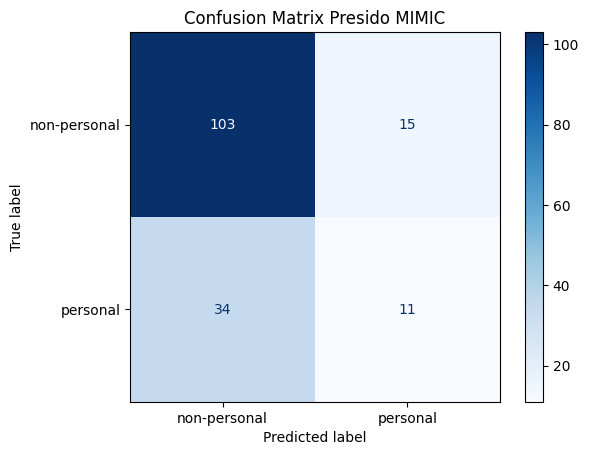

In [112]:
import matplotlib.pyplot as plt
# Compute confusion matrix
cmmimic = confusion_matrix(y_true_mimic, y_pred_mimic)

# Create a ConfusionMatrixDisplay object
dispmim = ConfusionMatrixDisplay(confusion_matrix=cmmimic, display_labels=['non-personal', 'personal'])

# Plot the confusion matrix
dispmim.plot(cmap=plt.cm.Blues)  # You can customize the colormap here
plt.title('Confusion Matrix Presido MIMIC')
plt.show()

In [42]:
results_df_lan = pd.DataFrame({
    "Column": lan_data.columns,
    "Prediction": results_lan_final.loc[results_lan_final.shape[0]-1].values,
    "True Label": lan_data_labels["label"].values,
    "Classes": lan_data_classes["class"],
    "Dataset": lan_data_dataset["dataset"]
})

In [114]:
y_true_lan = results_df_lan["True Label"].values
y_pred_lan = results_df_lan["Prediction"].values
target_names = ['non-personal', 'personal']
print(classification_report(y_true_lan, y_pred_lan, target_names=target_names))
f1_lan_micro = f1_score(y_true_lan, y_pred_lan, average="micro")
print(f'micro f1:{f1_lan_micro}')
f1_lan_macro = f1_score(y_true_lan, y_pred_lan, average="macro")
print(f'macro f1:{f1_lan_macro}')
f1_lan_weighted = f1_score(y_true_lan, y_pred_lan, average="weighted")
print(f'weighted f1:{f1_lan_weighted}')
balance_accur_lan = balanced_accuracy_score(y_true_lan, y_pred_lan)
print(f'balanced accuracy:{balance_accur_lan}')

              precision    recall  f1-score   support

non-personal       0.43      0.44      0.44        36
    personal       0.68      0.67      0.68        64

    accuracy                           0.59       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.59      0.59      0.59       100

micro f1:0.59
macro f1:0.5577607593571352
weighted f1:0.5911940459497358
balanced accuracy:0.5581597222222222


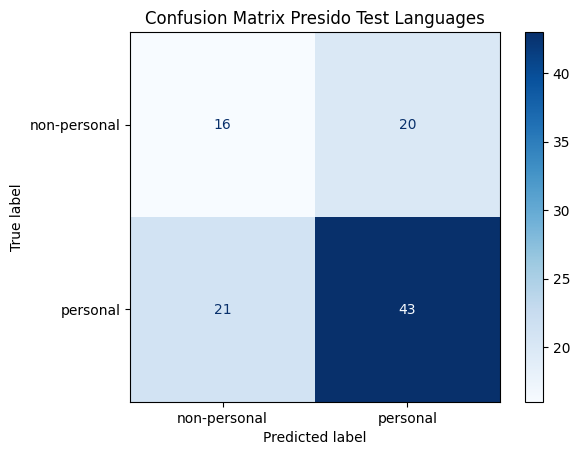

In [115]:
import matplotlib.pyplot as plt
# Compute confusion matrix
cmlan= confusion_matrix(y_true_lan, y_pred_lan)

# Create a ConfusionMatrixDisplay object
displan = ConfusionMatrixDisplay(confusion_matrix=cmlan, display_labels=['non-personal', 'personal'])

# Plot the confusion matrix
displan.plot(cmap=plt.cm.Blues)  # You can customize the colormap here
plt.title('Confusion Matrix Presido Test Languages')
plt.show()

In [116]:
CLASS_NAMES = results_df_lan["Classes"].unique()
CLASS_NAMES = [a.lower().split("_")[0] for a in CLASS_NAMES]

def is_valid_word(word):
    return word.lower().split("_")[0] in CLASS_NAMES

def create_analysis_plot(results_df, dataset="dessi-mf"):
    cla_new, lan = [], []
    for i in range(len(results_df["Classes"])):
        if "mixed" in results_df.iloc[i, 3] or "de_DE" in results_df.iloc[i, 3] or "fr_FR" in results_df.iloc[i, 3]:
            cla_new.append(results_df.iloc[i, 3][:-6])
        elif "_en" in results_df.iloc[i, 3] or "_de" in results_df.iloc[i, 3] or "_fr" in results_df.iloc[i, 3] or "_it" in results_df.iloc[i,3
                                                                        ] or "_zh" in results_df.iloc[i,3]:
            cla_new.append(results_df.iloc[i, 3][:-3])
        else:
            cla_new.append(results_df.iloc[i, 3])
            
        if "mixed" in results_df.iloc[i, 3]:
            lan.append("mixed language")
        elif "_fr" == results_df.iloc[i,3][-3:].lower():
            lan.append("french")
        elif "_it" == results_df.iloc[i,3][-3:].lower():
            lan.append("italian")
        elif "_zh" == results_df.iloc[i,3][-3:].lower():
            lan.append("chinese")
        elif "_de" == results_df.iloc[i,3][-3:].lower():
            lan.append("german")
        elif "_en" == results_df.iloc[i,3][-3:].lower():
            lan.append("english")
        else:
            lan.append("dessi data")
    results_df["Classes_new"] = cla_new
    results_df["Language"] = lan
    

    accuracies_lan = {}
    for i in results_df["Language"].unique():
        lan_df = results_df.loc[results_df["Language"] == i]
        accuracies_lan[i] = accuracy_score(lan_df["True Label"], lan_df["Prediction"])
    accuracies_cla = {}
    for i in results_df["Classes_new"].unique():
        cla_df = results_df.loc[results_df["Classes_new"] == i]
        accuracies_cla[i] = accuracy_score(cla_df["True Label"], cla_df["Prediction"])
    accuracies_dat = {}
    for i in results_df["Dataset"].unique():
        dat_df = results_df.loc[results_df["Dataset"] == i]
        accuracies_dat[i] = accuracy_score(dat_df["True Label"], dat_df["Prediction"])
    accuracies_col = {}
    ind = []
    for i in range(results_df.shape[0]):
        if is_valid_word(results_df.iloc[i, 0]):
            ind.append(i)
    accuracies_col["valid_col_names"] = accuracy_score(results_df.iloc[ind, 2], results_df.iloc[ind, 1])
    accuracies_col["invalid_col_names"] = accuracy_score(results_df.iloc[[a for a in range(results_df.shape[0]) if a not in ind], 2], 
                                                        results_df.iloc[[a for a in range(results_df.shape[0]) if a not in ind], 1])

    accuracies_cla = dict(sorted(accuracies_cla.items(), key=lambda item: item[1], reverse=True))
    accuracies_lan = dict(sorted(accuracies_lan.items(), key=lambda item: item[1], reverse=True))
    accuracies_col = dict(sorted(accuracies_col.items(), key=lambda item: item[1], reverse=True))
    accuracies_dat = dict(sorted(accuracies_dat.items(), key=lambda item: item[1], reverse=True))


    fig = make_subplots(rows=3, cols=1, subplot_titles=["Accuracy per Class", "Number of correct predictions per Class", "Number of false predictions per Class"],
                        shared_xaxes=True)
    fig.add_trace(go.Bar(
        x=list(accuracies_cla.keys()),
        y=list(accuracies_cla.values()),
        marker=dict(color="black"),
        showlegend=False
    ))
    
    colors = [
    "#d62728",  # Red (High Saturation)
    "#ff9896",  # Red (Low Saturation)
    "#1f77b4",  # Blue (High Saturation)
    "#aec7e8",  # Blue (Low Saturation)
    "#ff7f0e",  # Orange (High Saturation)
    "#ffbb78",  # Orange (Low Saturation)
    "#2ca02c",  # Green (High Saturation)
    "#98df8a",  # Green (Low Saturation)
    "#9467bd",  # Purple (High Saturation)
    "#c5b0d5",  # Purple (Low Saturation)
    ]

    languages = ['english', 'french', 'german', 'mixed language', 'dessi data'] if dataset != "two_languages" else ["italian", "chinese"]
    for bool_val in [True, False]:
        for e, language in enumerate(languages):
            lan_df = results_df.loc[results_df["Language"] == language]
            accuracies_cla = {}
            for ee, col_valid in enumerate([True, False]):
                percentage_of_this_language = []
                for i in lan_df["Classes_new"].unique():
                    cla_df = lan_df.loc[lan_df["Classes_new"] == i]
                    ind = []
                    for j in range(cla_df.shape[0]):
                        if is_valid_word(cla_df.iloc[j, 0]) == col_valid:
                            ind.append(j)
                    cla_df = cla_df.iloc[ind,:]
                    percentage_of_this_language.append(cla_df.shape[0] / results_df.loc[results_df["Classes_new"] == i].shape[0])
                    accuracies_cla[i] = (cla_df["True Label"] == cla_df["Prediction"]).value_counts(normalize=True).get(bool_val, 0)
                fig.add_trace(go.Bar(
                    x=list(accuracies_cla.keys()),
                    y=[a * b for a, b in zip(list(accuracies_cla.values()), percentage_of_this_language)],
                    marker=dict(color=colors[2*e+ee]),
                    name=f"{language}_" + ("valid" if col_valid == True else "invalid") + "<br>column name",
                    showlegend=True if bool_val == True else False,
                    legendgroup=2*e+ee
                ), row=2 if bool_val == True else 3, col=1)
    fig.update_layout(title="Accuracy per Class for Presidio's personal Predictions on own dataset", width=1500, height=700, barmode="stack")
    fig.update_yaxes(title_text="Accuracy", row=1, col=1)
    fig.update_yaxes(title_text="Amount of<br>correct predictions", row=2, col=1)
    fig.update_yaxes(title_text="Amount of<br>false predictions", row=3, col=1)
    fig.show()

    fig = make_subplots(
        rows=1, cols=3, shared_yaxes=True,
        subplot_titles=["Accuracy per Language", "Accuracy per Dataset", "Accuracy per Column Name"]
    )
    fig.add_trace(go.Bar(
        x=list(accuracies_lan.keys()),
        y=list(accuracies_lan.values()),
        showlegend=False
    ), row=1, col=1)
    fig.add_trace(go.Bar(
        x=list(accuracies_dat.keys()),
        y=list(accuracies_dat.values()),
        showlegend=False
    ), row=1, col=2)
    fig.add_trace(go.Bar(
        x=list(accuracies_col.keys()),
        y=list(accuracies_col.values()),
        showlegend=False
    ), row=1, col=3)
    fig.update_layout(width=900, height=500, title="Accuracy of Presidio's personal Predictions on own dataset with respect to different categories")
    fig.show()

In [117]:
create_analysis_plot(results_df_lan, dataset="two_languages")

No need of looking into more detail in Presidios wrong predictions

In [43]:
folders = [name for name in os.listdir("../../datasets/kaggle_datasets") if os.path.isdir(os.path.join("../../datasets/kaggle_datasets", name))]
dataset_kaggle, dataset_kaggle_info = [], []
dataset_type = ["pii info", "personal info", "non-personal info", "personal info", "personal info", "pii info", "pii info", "non-personal info",
                "non-personal info", "personal info", "pii info", "non-personal info", "personal info", "pii info", "non-personal info"]
for e, folder in enumerate(folders):
    path = "../../datasets/kaggle_datasets/" + folder
    csv_file = [f for f in os.listdir(path) if f.endswith('.csv') and 'labels' not in f][0]
    with open(path + "/" + csv_file, 'r') as file:
        first_line = file.readline()
        comma_count = first_line.count(',')
        semicolon_count = first_line.count(';')
        if comma_count > semicolon_count:
            sep = ","
        else:
            sep = ";"
    df = pd.read_csv(path + "/" + csv_file, sep=sep)
    dataset_kaggle += [folder] * df.shape[1]
    dataset_kaggle_info += [dataset_type[e]] * df.shape[1]



/tmp/ipykernel_741622/4182172880.py:16: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [44]:
results_df_kaggle = pd.DataFrame({
    "Column": kaggle_data.columns,
    "Prediction": results_kaggle_final.loc[results_kaggle_final.shape[0]-1].values,
    "True Label": kaggle_data_labels["label"].values,
    "Dataset": dataset_kaggle,
    "Dataset Type": dataset_kaggle_info
})

In [45]:
y_true_kag = results_df_kaggle["True Label"].values
y_pred_kag = results_df_kaggle["Prediction"].values
target_names = ['non-personal', 'personal']
print(classification_report(y_true_kag, y_pred_kag, target_names=target_names))
f1_kag_micro = f1_score(y_true_kag, y_pred_kag, average="micro")
print(f'micro f1:{f1_kag_micro}')
f1_kag_macro = f1_score(y_true_kag, y_pred_kag, average="macro")
print(f'macro f1:{f1_kag_macro}')
f1_kag_weighted = f1_score(y_true_kag, y_pred_kag, average="weighted")
print(f'weighted f1:{f1_kag_weighted}')
balance_accur_kag = balanced_accuracy_score(y_true_kag, y_pred_kag)
print(f'balanced accuracy:{balance_accur_kag}')

              precision    recall  f1-score   support

non-personal       0.20      0.31      0.24        91
    personal       0.42      0.29      0.34       155

    accuracy                           0.30       246
   macro avg       0.31      0.30      0.29       246
weighted avg       0.34      0.30      0.31       246

micro f1:0.2967479674796748
macro f1:0.29337340395503675
weighted f1:0.30607764310661517
balanced accuracy:0.2990074441687345


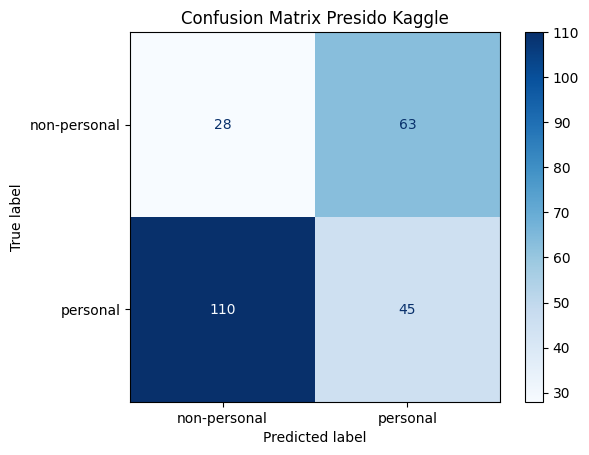

In [46]:
import matplotlib.pyplot as plt
# Compute confusion matrix
cmkag= confusion_matrix(y_true_kag, y_pred_kag)

# Create a ConfusionMatrixDisplay object
dispkag = ConfusionMatrixDisplay(confusion_matrix=cmkag, display_labels=['non-personal', 'personal'])

# Plot the confusion matrix
dispkag.plot(cmap=plt.cm.Blues)  # You can customize the colormap here
plt.title('Confusion Matrix Presido Kaggle')
plt.show()

In [47]:
#False negatives
results_df_kaggle.loc[(results_df_kaggle["True Label"] == "personal") & (results_df_kaggle["Prediction"] == "non-personal")]

,Column,Prediction,True Label,Dataset,Dataset Type
0,ID,non-personal,personal,bank_marketing,pii info
1,Reason for absence,non-personal,personal,bank_marketing,pii info
2,Month of absence,non-personal,personal,bank_marketing,pii info
3,Day of the week,non-personal,personal,bank_marketing,pii info
4,Seasons,non-personal,personal,bank_marketing,pii info
...,...,...,...,...,...
217,Walc,non-personal,personal,student_performance,pii info
218,health,non-personal,personal,student_performance,pii info
219,absences,non-personal,personal,student_performance,pii info
224,Survived,non-personal,personal,student_performance,pii info


In [48]:
#False positives
results_df_kaggle.loc[(results_df_kaggle["True Label"] == "personal") & (results_df_kaggle["Prediction"] == "non-personal")]

,Column,Prediction,True Label,Dataset,Dataset Type
0,ID,non-personal,personal,bank_marketing,pii info
1,Reason for absence,non-personal,personal,bank_marketing,pii info
2,Month of absence,non-personal,personal,bank_marketing,pii info
3,Day of the week,non-personal,personal,bank_marketing,pii info
4,Seasons,non-personal,personal,bank_marketing,pii info
...,...,...,...,...,...
217,Walc,non-personal,personal,student_performance,pii info
218,health,non-personal,personal,student_performance,pii info
219,absences,non-personal,personal,student_performance,pii info
224,Survived,non-personal,personal,student_performance,pii info


In [49]:
results_df_medical = pd.DataFrame({
    "Column": medical_data.columns,
    "Prediction": results_medical_final.loc[results_medical_final.shape[0]-1].values,
    "True Label": medical_data_labels["label"].values,
})

In [50]:
results_df_medical

,Column,Prediction,True Label
0,encounter_id,personal,personal
1,patient_id,personal,personal
2,admission_type,non-personal,personal
3,admission_reason,non-personal,personal
4,last_encounter,non-personal,personal
5,birth_date,personal,personal
6,aids,non-personal,personal
7,wloss,personal,personal
8,alcohol,non-personal,personal
9,drug,non-personal,personal


In [51]:
y_true_med = results_df_medical["True Label"].values
y_pred_med = results_df_medical["Prediction"].values
target_names = ['non-personal', 'personal']
print(classification_report(y_true_med, y_pred_med, target_names=target_names))
f1_med_micro = f1_score(y_true_med, y_pred_med, average="micro")
print(f'micro f1:{f1_med_micro}')
f1_med_macro = f1_score(y_true_med, y_pred_med, average="macro")
print(f'macro f1:{f1_med_macro}')
f1_med_weighted = f1_score(y_true_med, y_pred_med, average="weighted")
print(f'weighted f1:{f1_med_weighted}')

balance_accur_med = balanced_accuracy_score(y_true_med, y_pred_med)
print(f'balanced accuracy:{balance_accur_med}')

              precision    recall  f1-score   support

non-personal       0.00      0.00      0.00         0
    personal       1.00      0.31      0.48        32

    accuracy                           0.31        32
   macro avg       0.50      0.16      0.24        32
weighted avg       1.00      0.31      0.48        32

micro f1:0.3125
macro f1:0.23809523809523808
weighted f1:0.47619047619047616
balanced accuracy:0.3125


/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning:

y_pred contains classes not in y_true



In [53]:
results_df_medical[['Column', 'True Label']]

,Column,True Label
0,encounter_id,personal
1,patient_id,personal
2,admission_type,personal
3,admission_reason,personal
4,last_encounter,personal
5,birth_date,personal
6,aids,personal
7,wloss,personal
8,alcohol,personal
9,drug,personal


In [49]:
results_kaggle_final = build_dataframe_binary(results_rowwise1_kaggle, 0, 0)
results_openml_final = build_dataframe_binary(results_rowwise1_openml, 0.1, 50)
results_openml_2_final = build_dataframe_binary(results_rowwise2_openml_2, 0.1, 50)
results_medical_final = build_dataframe_binary(results_rowwise1_medical, 0, 0)

Threshold score: 0
Threshold count: 0
Threshold score: 0.1
Threshold count: 50
Threshold score: 0.1
Threshold count: 50
Threshold score: 0
Threshold count: 0


In [45]:
openml_data

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mackenzie Harris,andersonemily@example.net,andersonemily,1963-11-06,Female,Lake Barryland,2024-03-01,2025-03-01,Annual,...,NaN,NaN,37500.0,NaN,NaN,0,0,0,TIER 1,0
96,97,Stephanie Potter,heather10@example.org,heather10,1958-05-05,Female,New Teresaburgh,2024-03-25,2025-03-25,Monthly,...,479532.0,30186.0,73000.0,NaN,53.0,1,0,0,TIER 1,0
97,98,Mitchell Potter,fsanchez@example.net,fsanchez,1979-08-27,Male,South Katieburgh,2024-01-27,2025-01-26,Annual,...,NaN,NaN,48900.0,NaN,NaN,0,0,0,TIER 1,0
98,99,Jonathan Rodriguez,nichole85@example.net,nichole85,1967-12-20,Male,East Shannonhaven,2024-02-29,2025-02-28,Monthly,...,NaN,NaN,39000.0,NaN,NaN,0,0,0,TIER 1,0


In [50]:
results_openml_final

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,personal,personal,personal,personal,personal,personal,personal,personal,personal,personal,...,personal,personal,personal,personal,personal,personal,personal,personal,personal,personal
1,"(0, 11)","(12, 32)","(33, 75)","(76, 101)","(102, 128)","(129, 142)","(143, 168)","(169, 203)","(204, 236)","(237, 263)",...,"(3003, 3012)","(3013, 3022)","(3023, 3036)","(3037, 3046)","(3047, 3056)","(3057, 3064)","(3065, 3072)","(3073, 3080)","(3081, 3093)","(3094, 3101)"
2,[],['PERSON_0.85'],"['EMAIL_ADDRESS_1.0', 'URL_0.5']",[],"['DATE_TIME_0.95', 'IN_PAN_0.05']",[],['PERSON_0.85'],"['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']","['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']",['DATE_TIME_0.85'],...,"['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']","['DATE_TIME_0.85', 'US_DRIVER_LICENSE_0.3', 'P...","['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']","['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']",['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],"['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']"
3,"(0, 11)","(12, 30)","(31, 66)","(67, 85)","(86, 112)","(113, 126)","(127, 151)","(152, 186)","(187, 219)","(220, 247)",...,"(3012, 3021)","(3022, 3031)","(3032, 3045)","(3046, 3055)","(3056, 3065)","(3066, 3073)","(3074, 3081)","(3082, 3089)","(3090, 3102)","(3103, 3110)"
4,[],['PERSON_0.85'],"['EMAIL_ADDRESS_1.0', 'URL_0.5']",[],"['DATE_TIME_0.95', 'IN_PAN_0.05']",[],[],"['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']","['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']",[],...,"['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']","['DATE_TIME_0.85', 'US_DRIVER_LICENSE_0.3', 'P...","['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']","['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']",['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],"['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,"(0, 13)","(14, 35)","(36, 76)","(77, 100)","(101, 127)","(128, 143)","(144, 172)","(173, 207)","(208, 240)","(241, 267)",...,"(3012, 3026)","(3027, 3036)","(3037, 3050)","(3051, 3060)","(3061, 3071)","(3072, 3079)","(3080, 3087)","(3088, 3095)","(3096, 3108)","(3109, 3116)"
200,[],['PERSON_0.85'],"['EMAIL_ADDRESS_1.0', 'URL_0.5']",['DATE_TIME_0.85'],"['DATE_TIME_0.95', 'IN_PAN_0.05']",[],['NRP_0.85'],"['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']","['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']",['DATE_TIME_0.85'],...,"['US_DRIVER_LICENSE_0.3', 'US_DRIVER_LICENSE_0...","['DATE_TIME_0.85', 'US_DRIVER_LICENSE_0.3', 'P...","['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']","['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']",['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],"['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']"
201,[],[PERSON_0.85],"[EMAIL_ADDRESS_1.0, URL_0.5]",[],"[DATE_TIME_0.95, IN_PAN_0.05]",[],[],"[IN_PAN_0.05, DATE_TIME_0.95]","[IN_PAN_0.05, DATE_TIME_0.95]",[],...,"[US_DRIVER_LICENSE_0.3, PERSON_0.85]","[DATE_TIME_0.85, US_DRIVER_LICENSE_0.3, PERSON...","[PERSON_0.85, US_DRIVER_LICENSE_0.3]","[US_DRIVER_LICENSE_0.3, PERSON_0.85]",[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],"[PERSON_0.85, US_DRIVER_LICENSE_0.3]"
202,[],[100],"[100, 100]",[],"[100, 100]",[],[],"[200, 100]","[200, 100]",[],...,"[100, 85]","[100, 100, 87]","[100, 100]","[100, 90]",[100],[100],[100],[100],[100],"[100, 100]"


In [51]:
openml_data_labels

,label
0,personal
1,personal
2,personal
3,personal
4,personal
...,...
137,personal
138,personal
139,personal
140,personal


In [48]:
openml_data

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mackenzie Harris,andersonemily@example.net,andersonemily,1963-11-06,Female,Lake Barryland,2024-03-01,2025-03-01,Annual,...,NaN,NaN,37500.0,NaN,NaN,0,0,0,TIER 1,0
96,97,Stephanie Potter,heather10@example.org,heather10,1958-05-05,Female,New Teresaburgh,2024-03-25,2025-03-25,Monthly,...,479532.0,30186.0,73000.0,NaN,53.0,1,0,0,TIER 1,0
97,98,Mitchell Potter,fsanchez@example.net,fsanchez,1979-08-27,Male,South Katieburgh,2024-01-27,2025-01-26,Annual,...,NaN,NaN,48900.0,NaN,NaN,0,0,0,TIER 1,0
98,99,Jonathan Rodriguez,nichole85@example.net,nichole85,1967-12-20,Male,East Shannonhaven,2024-02-29,2025-02-28,Monthly,...,NaN,NaN,39000.0,NaN,NaN,0,0,0,TIER 1,0


In [52]:
openml_data_labels = pd.read_csv("../../datasets/openml_datasets/all_datasets_labels_personal.csv")
openml_data = pd.read_csv("../../datasets/openml_datasets/all_datasets.csv")

In [51]:
openml_data

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mackenzie Harris,andersonemily@example.net,andersonemily,1963-11-06,Female,Lake Barryland,2024-03-01,2025-03-01,Annual,...,NaN,NaN,37500.0,NaN,NaN,0,0,0,TIER 1,0
96,97,Stephanie Potter,heather10@example.org,heather10,1958-05-05,Female,New Teresaburgh,2024-03-25,2025-03-25,Monthly,...,479532.0,30186.0,73000.0,NaN,53.0,1,0,0,TIER 1,0
97,98,Mitchell Potter,fsanchez@example.net,fsanchez,1979-08-27,Male,South Katieburgh,2024-01-27,2025-01-26,Annual,...,NaN,NaN,48900.0,NaN,NaN,0,0,0,TIER 1,0
98,99,Jonathan Rodriguez,nichole85@example.net,nichole85,1967-12-20,Male,East Shannonhaven,2024-02-29,2025-02-28,Monthly,...,NaN,NaN,39000.0,NaN,NaN,0,0,0,TIER 1,0


In [52]:
# results_df_lan = pd.DataFrame({
#     "Column": lan_data.columns,
#     "Prediction": results_lan_final.loc[results_lan_final.shape[0]-1].values,
#     "True Label": lan_data_labels["label"].values,
#     "Classes": openml_data["class"],
#     "Dataset": openml_data["dataset"]
# })

## OPENML

In [53]:
results_openml_final = build_dataframe_binary(results_rowwise1_openml, 0.1, 50)
results_openml_2_final = build_dataframe_binary(results_rowwise2_openml_2, 0.1, 50)

Threshold score: 0.1
Threshold count: 50
Threshold score: 0.1
Threshold count: 50


In [54]:
results_df_open1 = pd.DataFrame({
    "Column": openml_data.columns,
    "Prediction": results_openml_final.loc[results_openml_final.shape[0]-1].values,
    "True Label": openml_data_labels["label"].values,
})

In [58]:
results_openml_final

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,personal,personal,personal,personal,personal,personal,personal,personal,personal,personal,...,personal,personal,personal,personal,personal,personal,personal,personal,personal,personal
1,"(0, 11)","(12, 32)","(33, 75)","(76, 101)","(102, 128)","(129, 142)","(143, 168)","(169, 203)","(204, 236)","(237, 263)",...,"(3003, 3012)","(3013, 3022)","(3023, 3036)","(3037, 3046)","(3047, 3056)","(3057, 3064)","(3065, 3072)","(3073, 3080)","(3081, 3093)","(3094, 3101)"
2,[],['PERSON_0.85'],"['EMAIL_ADDRESS_1.0', 'URL_0.5']",[],"['DATE_TIME_0.95', 'IN_PAN_0.05']",[],['PERSON_0.85'],"['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']","['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']",['DATE_TIME_0.85'],...,"['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']","['DATE_TIME_0.85', 'US_DRIVER_LICENSE_0.3', 'P...","['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']","['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']",['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],"['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']"
3,"(0, 11)","(12, 30)","(31, 66)","(67, 85)","(86, 112)","(113, 126)","(127, 151)","(152, 186)","(187, 219)","(220, 247)",...,"(3012, 3021)","(3022, 3031)","(3032, 3045)","(3046, 3055)","(3056, 3065)","(3066, 3073)","(3074, 3081)","(3082, 3089)","(3090, 3102)","(3103, 3110)"
4,[],['PERSON_0.85'],"['EMAIL_ADDRESS_1.0', 'URL_0.5']",[],"['DATE_TIME_0.95', 'IN_PAN_0.05']",[],[],"['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']","['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']",[],...,"['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']","['DATE_TIME_0.85', 'US_DRIVER_LICENSE_0.3', 'P...","['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']","['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']",['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],"['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,"(0, 13)","(14, 35)","(36, 76)","(77, 100)","(101, 127)","(128, 143)","(144, 172)","(173, 207)","(208, 240)","(241, 267)",...,"(3012, 3026)","(3027, 3036)","(3037, 3050)","(3051, 3060)","(3061, 3071)","(3072, 3079)","(3080, 3087)","(3088, 3095)","(3096, 3108)","(3109, 3116)"
200,[],['PERSON_0.85'],"['EMAIL_ADDRESS_1.0', 'URL_0.5']",['DATE_TIME_0.85'],"['DATE_TIME_0.95', 'IN_PAN_0.05']",[],['NRP_0.85'],"['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']","['IN_PAN_0.05', 'DATE_TIME_0.95', 'IN_PAN_0.05']",['DATE_TIME_0.85'],...,"['US_DRIVER_LICENSE_0.3', 'US_DRIVER_LICENSE_0...","['DATE_TIME_0.85', 'US_DRIVER_LICENSE_0.3', 'P...","['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']","['US_DRIVER_LICENSE_0.3', 'PERSON_0.85']",['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],['US_DRIVER_LICENSE_0.3'],"['PERSON_0.85', 'US_DRIVER_LICENSE_0.3']"
201,[],[PERSON_0.85],"[EMAIL_ADDRESS_1.0, URL_0.5]",[],"[DATE_TIME_0.95, IN_PAN_0.05]",[],[],"[IN_PAN_0.05, DATE_TIME_0.95]","[IN_PAN_0.05, DATE_TIME_0.95]",[],...,"[US_DRIVER_LICENSE_0.3, PERSON_0.85]","[DATE_TIME_0.85, US_DRIVER_LICENSE_0.3, PERSON...","[PERSON_0.85, US_DRIVER_LICENSE_0.3]","[US_DRIVER_LICENSE_0.3, PERSON_0.85]",[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],[US_DRIVER_LICENSE_0.3],"[PERSON_0.85, US_DRIVER_LICENSE_0.3]"
202,[],[100],"[100, 100]",[],"[100, 100]",[],[],"[200, 100]","[200, 100]",[],...,"[100, 85]","[100, 100, 87]","[100, 100]","[100, 90]",[100],[100],[100],[100],[100],"[100, 100]"


In [56]:
results_df_open1

,Column,Prediction,True Label
0,User ID,non-personal,personal
1,Name,personal,personal
2,Email Address,personal,personal
3,Username,non-personal,personal
4,Date of Birth,non-personal,personal
...,...,...,...
137,V28,personal,personal
138,V29,personal,personal
139,V30,personal,personal
140,V31,personal,personal


In [55]:
y_true_open1 = results_df_open1["True Label"]
y_pred_open1 = results_df_open1["Prediction"]
target_names = ['non-personal', 'personal']
print(classification_report(y_true_open1, y_pred_open1, target_names=target_names))
f1_open1_micro = f1_score(y_true_open1, y_pred_open1, average="micro")
print(f'micro f1:{f1_open1_micro}')
f1_open1_macro = f1_score(y_true_open1, y_pred_open1, average="macro")
print(f'macro f1:{f1_open1_macro}')
f1_open1_weighted = f1_score(y_true_open1, y_pred_open1, average="weighted")
print(f'weighted f1:{f1_open1_weighted}')

balance_accur_open1 = balanced_accuracy_score(y_true_open1, y_pred_open1)
print(f'balanced accuracy:{balance_accur_open1}')

              precision    recall  f1-score   support

non-personal       0.65      0.86      0.74        72
    personal       0.79      0.53      0.63        70

    accuracy                           0.70       142
   macro avg       0.72      0.69      0.69       142
weighted avg       0.72      0.70      0.69       142

micro f1:0.6971830985915493
macro f1:0.6874968012692564
weighted f1:0.6882717050550398
balanced accuracy:0.6948412698412698


In [62]:
results_df_open2 = pd.DataFrame({
    "Column": openml_2_data.columns,
    "Prediction": results_openml_2_final.loc[results_openml_2_final.shape[0]-1].values,
    "True Label": openml_2_data_labels["label"].values,
})

In [63]:
y_true_open2 = results_df_open2["True Label"].values
y_pred_open2 = results_df_open2["Prediction"].values
target_names = ['non-personal', 'personal']
print(classification_report(y_true_open2, y_pred_open2, target_names=target_names))
f1_open2_micro = f1_score(y_true_open2, y_pred_open2, average="micro")
print(f'micro f1:{f1_open2_micro}')
f1_open2_macro = f1_score(y_true_open2, y_pred_open2, average="macro")
print(f'macro f1:{f1_open2_macro}')
f1_open2_weighted = f1_score(y_true_open2, y_pred_open2, average="weighted")
print(f'weighted f1:{f1_open2_weighted}')

balance_accur_open2 = balanced_accuracy_score(y_true_open2, y_pred_open2)
print(f'balanced accuracy:{balance_accur_open2}')

              precision    recall  f1-score   support

non-personal       0.90      1.00      0.95       104
    personal       1.00      0.08      0.15        12

    accuracy                           0.91       116
   macro avg       0.95      0.54      0.55       116
weighted avg       0.91      0.91      0.87       116

micro f1:0.9051724137931034
macro f1:0.5518089216719353
weighted f1:0.8674345651199689
balanced accuracy:0.5416666666666666


Resultat MIMICNew

In [56]:
visualize_results([df_rowwise1_mimicNew,df_rowwise2_mimicNew, df_columnwise_mimicNew], data_mimicNew, labels_mimicNew, "MIMICNew", "0", "30")
results_mimic_finalNew = build_dataframe_binary(results_rowwise2_mimicNew, 0., 30)


Threshold score: 0.0
Threshold count: 30


In [57]:
plot_presidio_results(labels_mimicNew, results_mimic_finalNew, "MIMICNew")

In [58]:
results_df_mimicNew = pd.DataFrame({
    "Column": data_mimicNew.columns,
    "Prediction": results_mimic_finalNew.loc[results_mimic_finalNew.shape[0]-1].values,
    "True Label": labels_mimicNew["label"].values,
})

In [59]:
y_true_mimicNew = results_df_mimicNew["True Label"].values
y_pred_mimicNew = results_df_mimicNew["Prediction"].values
target_names = ['non-personal', 'personal']
print(classification_report(y_true_mimicNew, y_pred_mimicNew, target_names=target_names))
f1_mimic_micronew = f1_score(y_true_mimicNew, y_pred_mimicNew, average="micro")
print(f'micro f1:{f1_mimic_micronew}')
f1_mimic_macronew = f1_score(y_true_mimicNew, y_pred_mimicNew, average="macro")
print(f'macro f1:{f1_mimic_macronew}')
f1_mimic_weightednew = f1_score(y_true_mimicNew, y_pred_mimicNew, average="weighted")
print(f'weighted f1:{f1_mimic_weightednew}')

balance_accur_mimicnew = balanced_accuracy_score(y_true_mimicNew, y_pred_mimicNew)
print(f'balanced accuracy:{balance_accur_mimicnew}')

              precision    recall  f1-score   support

non-personal       0.83      0.80      0.81       120
    personal       0.49      0.53      0.51        43

    accuracy                           0.73       163
   macro avg       0.66      0.67      0.66       163
weighted avg       0.74      0.73      0.73       163

micro f1:0.7300613496932515
macro f1:0.6623352165725047
weighted f1:0.7337723706861692
balanced accuracy:0.6674418604651162


090

Openmlall

In [60]:
visualize_results([df_rowwise1_openmlall,df_rowwise2_openmlall, df_columnwise_openmlall], data_openmlall, labels_openmlall, "OpenMLall", "0", "90")
results_openmlall_final = build_dataframe_binary(results_rowwise1_openmlall, 0., 90)

Threshold score: 0.0
Threshold count: 90


In [61]:
plot_presidio_results(labels_openmlall, results_openmlall_final, "OpenMLall")


In [62]:
results_df_openmlall = pd.DataFrame({
    "Column": data_openmlall.columns,
    "Prediction": results_openmlall_final.loc[results_openmlall_final.shape[0]-1].values,
    "True Label": labels_openmlall["label"].values,
})

In [63]:
y_true_openmlall = results_df_openmlall["True Label"].values
y_pred_openmlall = results_df_openmlall["Prediction"].values
target_names = ['non-personal', 'personal']
print(classification_report(y_true_openmlall, y_pred_openmlall, target_names=target_names))
f1_openall_micro = f1_score(y_true_openmlall, y_pred_openmlall, average="micro")
print(f'micro f1:{f1_openall_micro}')
f1_openall_macro = f1_score(y_true_openmlall, y_pred_openmlall, average="macro")
print(f'macro f1:{f1_openall_macro}')
f1_openall_weighted = f1_score(y_true_openmlall, y_pred_openmlall, average="weighted")
print(f'weighted f1:{f1_openall_weighted}')

balance_accur_openall = balanced_accuracy_score(y_true_openmlall, y_pred_openmlall)
print(f'balanced accuracy:{balance_accur_openall}')

              precision    recall  f1-score   support

non-personal       0.79      0.82      0.81       176
    personal       0.59      0.54      0.56        82

    accuracy                           0.73       258
   macro avg       0.69      0.68      0.68       258
weighted avg       0.73      0.73      0.73       258

micro f1:0.7325581395348837
macro f1:0.6841544985185317
weighted f1:0.7292034317416713
balanced accuracy:0.6802245011086474


Confusion Matrix Presidio

DESSI-MF results imported

In [64]:
import pandas as pd

In [65]:
y_true_dessi1 =pd.read_csv('y_true_dessi1.csv')

In [66]:
y_pred_dessi1 = pd.read_csv('y_pred_dessi1.csv')

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, balanced_accuracy_score
confusion_matrix(y_true_dessi1,y_pred_dessi1)
 

array([[5154, 1538],
       [2293, 5753]])

In [68]:
f1m =f1_score(y_true_dessi1,y_pred_dessi1, average='micro')
f1ma = f1_score(y_true_dessi1,y_pred_dessi1, average='macro')
balac=balanced_accuracy_score(y_true_dessi1,y_pred_dessi1)

In [69]:
print(f'f1_score micro: {f1m}')
print(f'f1_score macro: {f1ma}')
print(f'bal acc: {balac}')
print(classification_report(y_true_dessi1,y_pred_dessi1 ))

f1_score micro: 0.7400597095942462
f1_score macro: 0.7396296108916252
bal acc: 0.7425935063462794
              precision    recall  f1-score   support

non-personal       0.69      0.77      0.73      6692
    personal       0.79      0.72      0.75      8046

    accuracy                           0.74     14738
   macro avg       0.74      0.74      0.74     14738
weighted avg       0.75      0.74      0.74     14738



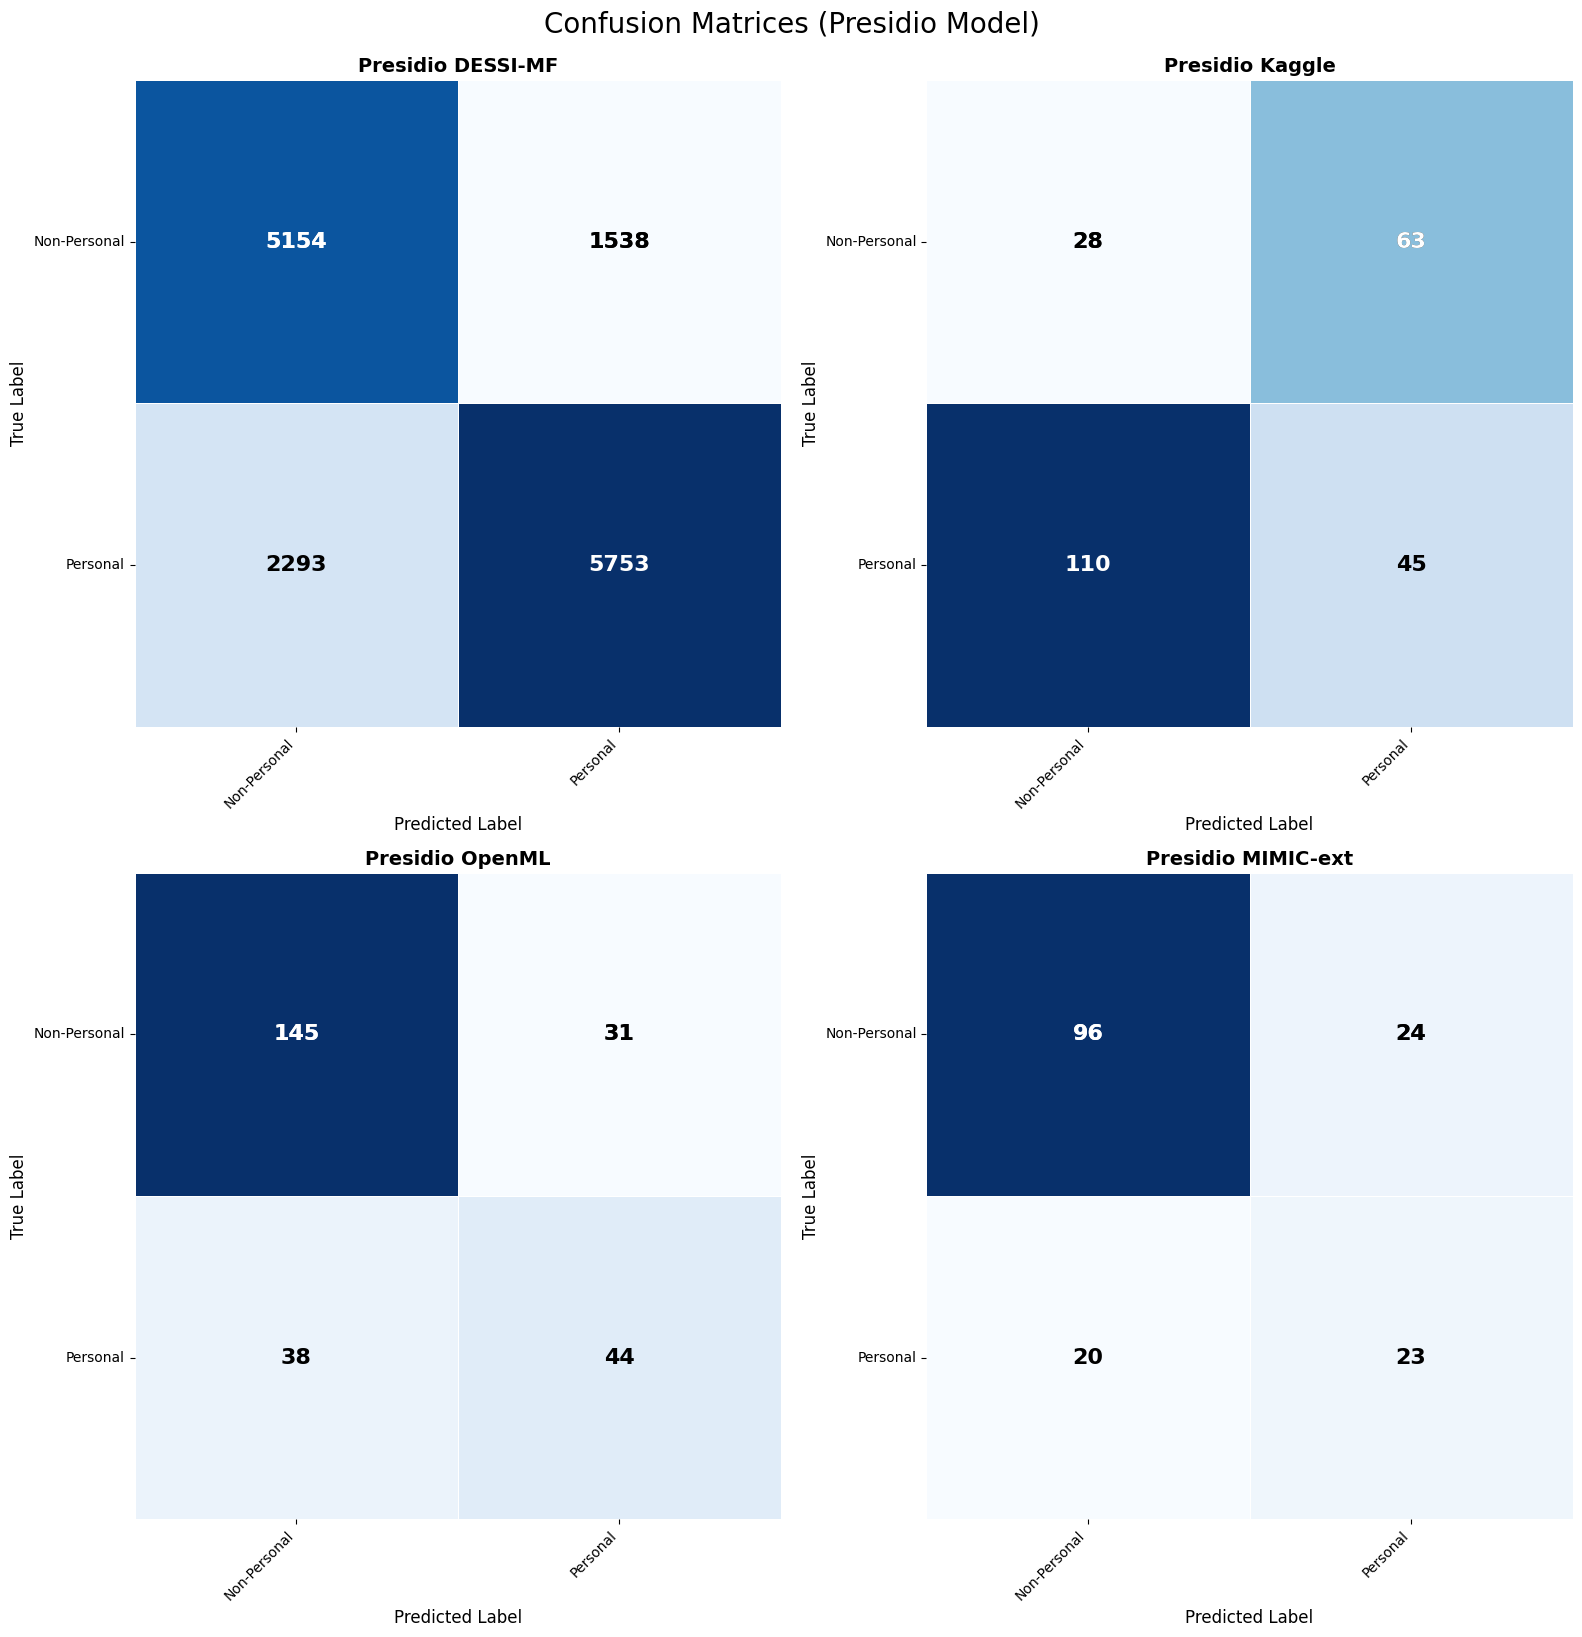

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                annot_kws={"size": 16, "weight": "bold"},
                square=True, linewidths=0.5)
    
    # Manually add text for each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j+0.5, i+0.5, str(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max()/2 else "black",
                    fontsize=16, fontweight='bold')
    
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticklabels(['Non-Personal', 'Personal'], rotation=45, ha='right')
    ax.set_yticklabels(['Non-Personal', 'Personal'], rotation=0)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

# Plot each confusion matrix
plot_confusion_matrix(axes[0], y_true_dessi1, y_pred_dessi1, "Presidio DESSI-MF")
plot_confusion_matrix(axes[1], y_true_kag, y_pred_kag, "Presidio Kaggle")
plot_confusion_matrix(axes[2], y_true_openmlall, y_pred_openmlall, "Presidio OpenML")
plot_confusion_matrix(axes[3], y_true_mimicNew, y_pred_mimicNew, "Presidio MIMIC-ext")

# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle("Confusion Matrices (Presidio Model)", fontsize=20, y=1.02)

# Save the figure as a high-resolution image
plt.savefig("confusion_matrices_presidio.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
